# Big-O

In [1]:
def fact(n):
    product = 1
    for i in range(n):
        product = product * (i+1)
    return product

print (fact(5))

120


In [2]:
def fact2(n):
    if n == 0:
        return 1
    else:
        return n * fact2(n-1)

print (fact2(5))

120


In [3]:
%timeit (fact(50))

13.6 µs ± 508 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
%timeit (fact2(50))

31.3 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## The execution time shows that the first algorithm is faster compared to the second algorithm involving recursion. This example shows the importance of algorithm analysis. In the case of large inputs, the performance difference can become more significant.

However, execution time is not a good metric to measure the complexity of an algorithm since it depends upon the hardware. A more objective complexity analysis metrics for the algorithms is needed. This is where Big O notation comes to play.

# Dynamic Array Exercise
____

In this exercise we will create our own Dynamic Array class!

We'll be using a built in library called [ctypes](https://docs.python.org/2/library/ctypes.html). Check out the documentation for more info, but its basically going to be used here as a raw array from the ctypes module.
If you find yourself very interested in it, check out: [Ctypes Tutorial](http://starship.python.net/crew/theller/ctypes/tutorial.html)

Also...

In [213]:
import array

In [1]:
import sys

In [2]:
l=[]
for i in range(20):
    
    a=len(l)
    b=sys.getsizeof(l)
    print("Length of the list is: {}".format(a),"and the size is: {}".format(b))
    
    l.append(i)
    

Length of the list is: 0 and the size is: 64
Length of the list is: 1 and the size is: 96
Length of the list is: 2 and the size is: 96
Length of the list is: 3 and the size is: 96
Length of the list is: 4 and the size is: 96
Length of the list is: 5 and the size is: 128
Length of the list is: 6 and the size is: 128
Length of the list is: 7 and the size is: 128
Length of the list is: 8 and the size is: 128
Length of the list is: 9 and the size is: 192
Length of the list is: 10 and the size is: 192
Length of the list is: 11 and the size is: 192
Length of the list is: 12 and the size is: 192
Length of the list is: 13 and the size is: 192
Length of the list is: 14 and the size is: 192
Length of the list is: 15 and the size is: 192
Length of the list is: 16 and the size is: 192
Length of the list is: 17 and the size is: 264
Length of the list is: 18 and the size is: 264
Length of the list is: 19 and the size is: 264


## Encapsulation
### Protected members:
#### **Prefixing the name of your member with a single underscore, you’re telling others “don’t touch this, unless you’re a subclass”. See the example below:**

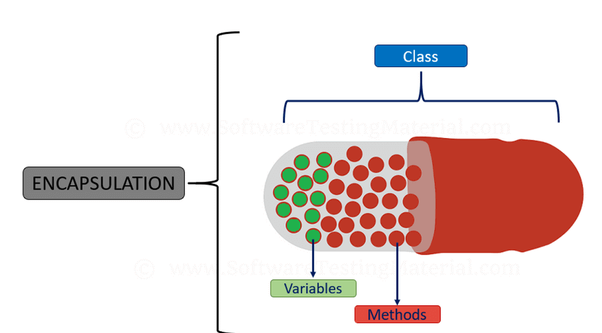

In [5]:
class M(object):
    
    def public(self):
        print ('Use Tab to see me!')
        
    def _private(self):
        print ("You won't be able to Tab to see me!")

In [6]:
m = M()

In [7]:
m.public()

Use Tab to see me!


In [8]:
m._private()

You won't be able to Tab to see me!


## Private members:

But there is a method in Python to define Private: Add “__” (double underscore ) in front of the variable and function name can hide them when accessing them from out of class.

***Python doesn’t have real private methods, so one underline in the beginning of a method or attribute means you shouldn’t access this method.But this is just convention.I can still access the the variables with single underscore.***

In [9]:
class M(object):
    
    def public(self):
        print ('Use Tab to see me!')
        
    def __private(self):
        print ("You won't be able to Tab to see me!")

In [10]:
m = M()
m.__private()

AttributeError: 'M' object has no attribute '__private'

In [11]:
m._M__private()

You won't be able to Tab to see me!


In [30]:
import ctypes

In [31]:
class DynamicArray():
    def __init__(self):
        self.n=0
        self.capacity=1
        self.A=self.make_array(self.capacity)
    def __len__(self):
        return self.n
    
    def __getitem__(self,k):
        if not 0<=k<self.n:
            return IndentationError("K is out of range!")
        return self.A[k]
    
    def append(self,val):
        if self.n==self.capacity:
            self._resize(2*self.capacity)
            
        self.A[self.n]=val
        self.n+=1
    
    def _resize(self,cap):
        B=self.make_array(cap)
        for i in range(self.n):
            B[i] =self.A[i]
        
        self.A=B
        self.capacity=cap
    
    def make_array(self, cap):
        return (cap * ctypes.py_object)()

In [48]:
arr=DynamicArray()

In [49]:
arr.append(50)
arr.append(30)
arr.append(40)

In [50]:
len(arr)

3

# Stack

____

A stack is an ordered collection of items where the addition of new items and the removal of existing items always takes place at the same end. This end is commonly referred to as the “top.” The end opposite the top is known as the “base.” 

The base of the stack is significant since items stored in the stack that are closer to the base represent those that have been in the stack the longest. The most recently added item is the one that is in position to be removed first. 

**This ordering principle is sometimes called LIFO, last-in first-out.** It provides an ordering based on length of time in the collection. Newer items are near the top, while older items are near the base.

For example, consider the figure below:

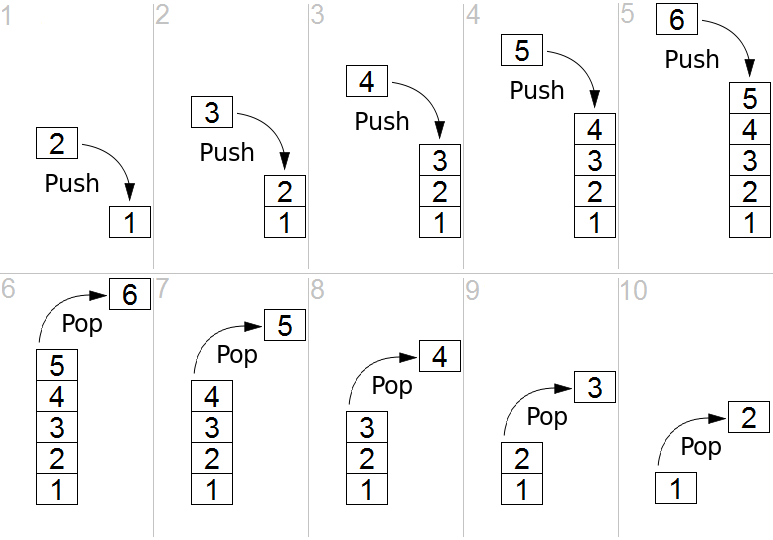

In [125]:
from IPython.display import Image
Image(filename='download (1).png')


## Stack Attributes and Methods

Before we implement our own Stack class, let's review the properties and methods of a Stack.

The stack abstract data type is defined by the following structure and operations. A stack is structured, as described above, as an ordered collection of items where items are added to and removed from the end called the “top.” Stacks are ordered LIFO. The stack operations are given below.

* Stack() creates a new stack that is empty. It needs no parameters and returns an empty stack.
* push(item) adds a new item to the top of the stack. It needs the item and returns nothing.
* pop() removes the top item from the stack. It needs no parameters and returns the item. The stack is modified.
* peek() returns the top item from the stack but does not remove it. It needs no parameters. The stack is not modified.
* isEmpty() tests to see whether the stack is empty. It needs no parameters and returns a boolean value.
* size() returns the number of items on the stack. It needs no parameters and returns an integer.

In [13]:
class Stack():
    def __init__(self):
        self.items=[]
    
    def isEmpty(self):
        return self.items==[]
    def push (self,item):
        self.items.append(item)
        print("New item Added!")
        
    def pop(self):
        return self.items.pop()
    
    def peek(self):
        return self.items[-1]
    
    def size(self):
        return len(self.items)
    
    def print_items(self):
        print("Stack items:",self.items)
    

In [14]:
ss=Stack()

In [15]:
ss.isEmpty()

True

In [16]:
ss.push(5)
ss.push(6)
ss.push(7)

New item Added!
New item Added!
New item Added!


In [17]:
ss.isEmpty()

False

In [18]:
ss.print_items()

Stack items: [5, 6, 7]


In [19]:
ss.size()

3

In [20]:
ss.pop()

7

In [21]:
ss.print_items()

Stack items: [5, 6]


In [22]:
ss.peek()

6

In [23]:
ss.print_items()

Stack items: [5, 6]


# Queue

____
A **queue** is an ordered collection of items where the addition of new items happens at one end, called the “rear,” and the removal of existing items occurs at the other end, commonly called the “front.” As an element enters the queue it starts at the rear and makes its way toward the front, waiting until that time when it is the next element to be removed.

The most recently added item in the queue must wait at the end of the collection. The item that has been in the collection the longest is at the front. This ordering principle is sometimes called **FIFO, first-in first-out**. It is also known as “first-come first-served.”

The simplest example of a queue is the typical line that we all participate in from time to time. We wait in a line for a movie, we wait in the check-out line at a grocery store, and we wait in the cafeteria line. The first person in that line is also the first person to get serviced/helped. 

Let's see a diagram which shows this and compares it to the Stack Data Structure:

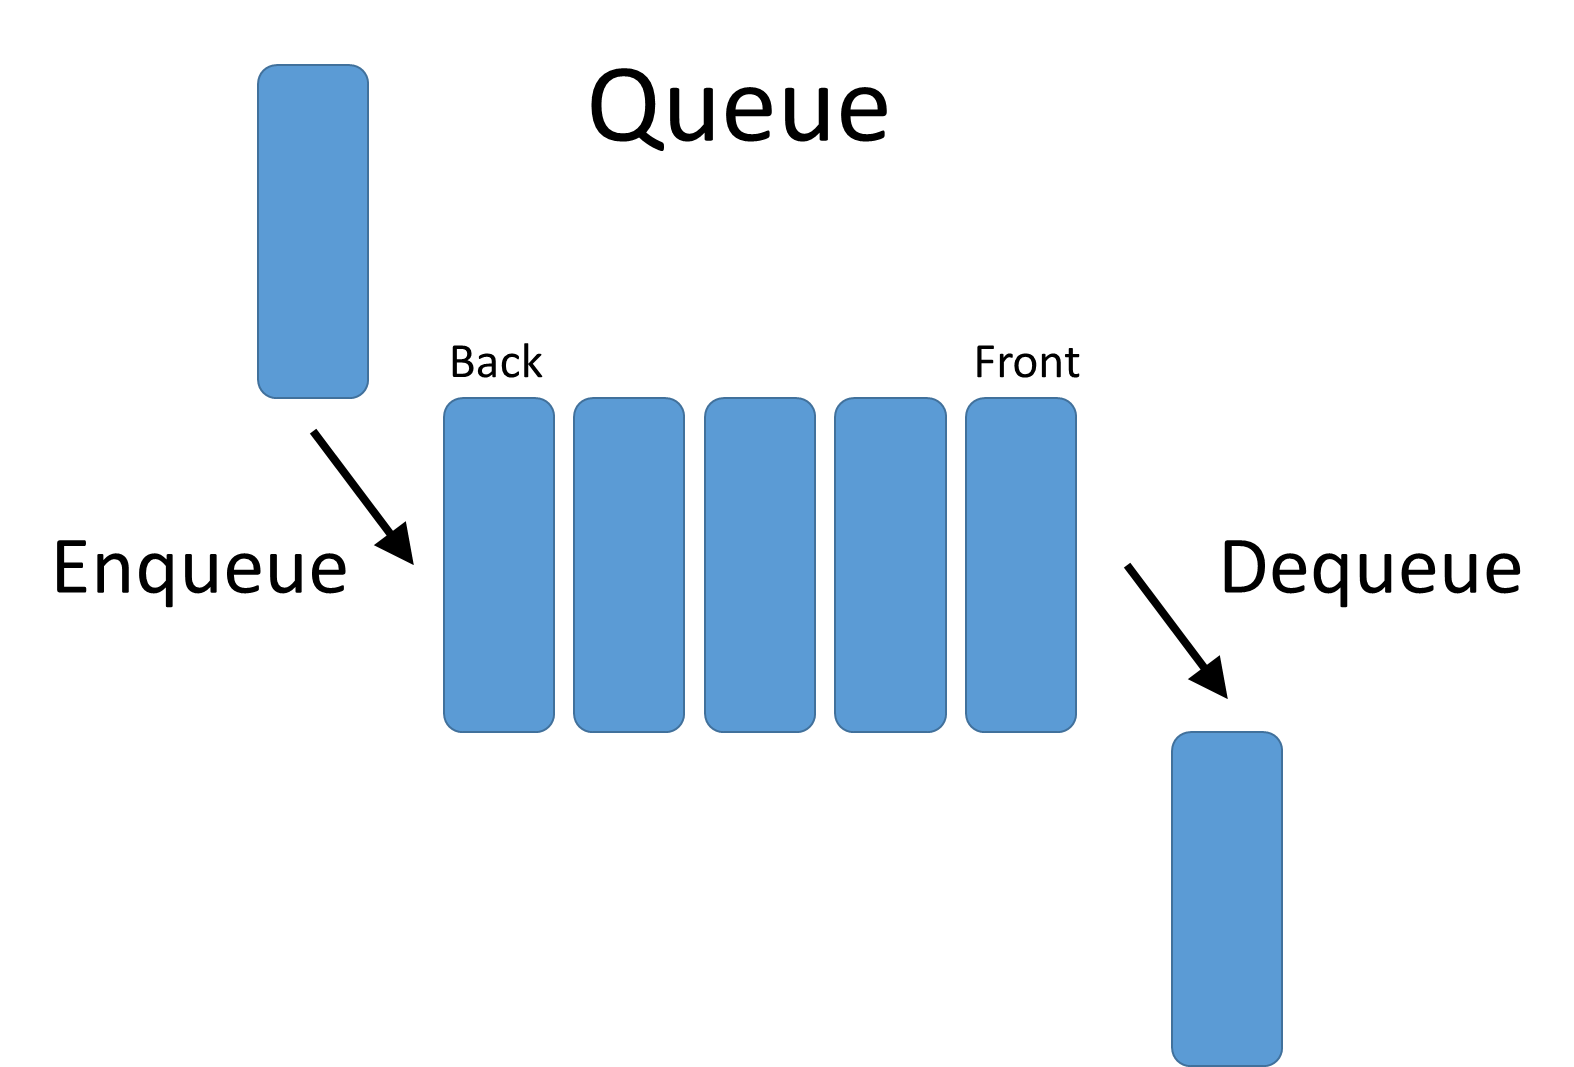

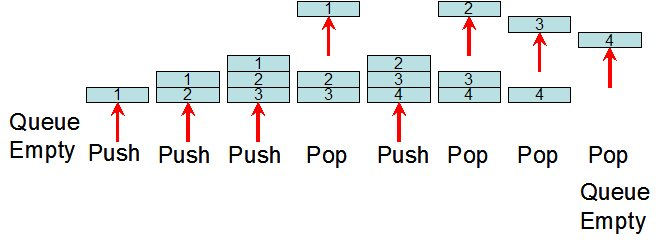

____
## Queue Methods and Attributes


Before we begin implementing our own queue, let's review the attribute and methods it will have:

* Queue() creates a new queue that is empty. It needs no parameters and returns an empty queue.
* enqueue(item) adds a new item to the rear of the queue. It needs the item and returns nothing.
* dequeue() removes the front item from the queue. It needs no parameters and returns the item. The queue is modified.
* isEmpty() tests to see whether the queue is empty. It needs no parameters and returns a boolean value.
* size() returns the number of items in the queue. It needs no parameters and returns an integer.

In [32]:
class Queue:
    def __init__(self):
        self.items=[]
    
    def isEmpty(self):
        return self.items==[]
    
    def enqueue(self,item):
        self.items.insert(0,item)
        print("Item inserted!")
    def peek(self):
        return self.items[-1]
        
    def dequeue(self):
        return self.items.pop()
    
    def size(self):
        return len(self.items)
    
    def print_items(self):
        print("Queue items:",self.items)

In [47]:
q=Queue()

In [48]:
q.isEmpty()

True

In [49]:
q.enqueue(4)
q.enqueue(5)
q.enqueue(7)

Item inserted!
Item inserted!
Item inserted!


In [50]:
q.isEmpty()

False

In [51]:
q.print_items()

Queue items: [7, 5, 4]


In [52]:
q.size()

3

In [53]:
q.peek()

4

In [39]:
q.dequeue()

4

In [40]:
q.dequeue()

5

In [42]:
q.peek()

7

In [43]:
q.print_items()

Queue items: [7]


# Deque (Double Ended Queue)

A deque, also known as a double-ended queue, is an ordered collection of items similar to the queue. It has two ends, a front and a rear, and the items remain positioned in the collection. What makes a deque different is the unrestrictive nature of adding and removing items. New items can be added at either the front or the rear. Likewise, existing items can be removed from either end. In a sense, this hybrid linear structure provides all the capabilities of stacks and queues in a single data structure. 

It is important to note that even though the deque can assume many of the characteristics of stacks and queues, it does not require the LIFO and FIFO orderings that are enforced by those data structures. It is up to you to make consistent use of the addition and removal operations.

Let's see an Image to visualize the Deque Data Structure:

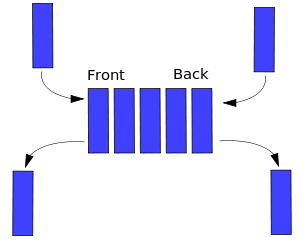


## Methods and Attributes

* Deque() creates a new deque that is empty. It needs no parameters and returns an empty deque.
* addFront(item) adds a new item to the front of the deque. It needs the item and returns nothing.
* addRear(item) adds a new item to the rear of the deque. It needs the item and returns nothing.
* removeFront() removes the front item from the deque. It needs no parameters and returns the item. The deque is modified.
* removeRear() removes the rear item from the deque. It needs no parameters and returns the item. The deque is modified.
* isEmpty() tests to see whether the deque is empty. It needs no parameters and returns a boolean value.
* size() returns the number of items in the deque. It needs no parameters and returns an integer.

In [54]:
class deque():
    def __init__(self):
        self.items=[]
    
    def isEmpty(self):
        return self.items==[]
    
    def addFront(self,item):
        self.items.append(item)
        print("item inserted from the Front")
    
    def addRear(self,item):
        self.items.insert(0,item)
        print("item inserted from the Rear")
        
    
    def removeFront(self):
        return self.items.pop()
    
    def removeRear(self):
        return self.items.pop(0)
    
    def size(self):
        return len(self.items)
    
    def print_items(self):
        print("Queue items:",self.items)

In [55]:
dq=deque()

In [56]:
dq.isEmpty()

True

In [57]:
dq.addFront(5)
dq.addFront(6)

dq.addRear(1)
dq.addRear(2)

item inserted from the Front
item inserted from the Front
item inserted from the Rear
item inserted from the Rear


In [58]:
dq.isEmpty()

False

In [59]:
dq.print_items()

Queue items: [2, 1, 5, 6]


In [60]:
dq.removeFront()

6

In [61]:
dq.removeRear()

2

In [62]:
dq.print_items()

Queue items: [1, 5]


# Singly linked List

In [3]:
class Node():
    def __init__(self,value,nextnode=None):
        self.value=value
        self.nextnode=nextnode

In [4]:
a=Node(1)
b=Node(2)

In [72]:
b.value

2

In [5]:
a.nextnode=b

In [66]:
b.nextnode=c

In [68]:
a.nextnode.value

2

In [165]:
b.nextnode.value

3

In [166]:
c.nextnode.value

AttributeError: 'NoneType' object has no attribute 'value'

In a Linked List the first node is called the **head** and the last node is called the **tail**. Let's discuss the pros and cons of Linked Lists:

## Pros

* Linked Lists have constant-time insertions and deletions in any position, in comparison, arrays require O(n) time to do the same thing.

* Linked lists can continue to expand without having to specify their size ahead of time (remember our lectures on Array sizing form the Array Sequence section of the course!)

## Cons

* To access an element in a linked list, you need to take O(n) time to go from the head of the list to the nth element. In contrast, arrays have constant time operations to access elements in an array.

# Doubly Linked List

In [8]:
class DoublyLinkedListNode():
    def __init__(self,value):
        
        self.value = value
        self.next_node = None
        self.prev_node = None

In [9]:
a = DoublyLinkedListNode(1)
b = DoublyLinkedListNode(2)
c = DoublyLinkedListNode(3)

In [10]:
# Setting b after a
b.prev_node = a
a.next_node = b

In [11]:
# Setting c after a
b.next_node = c
c.prev_node = b

In [14]:
b.prev_node.next_node.value

2

In [15]:
a<--b-->c

2

In [16]:
b.prev_node.next_node=b.next_node

# Introduction to Recursion

In this lecture we will go over the basics of Recursion.

## What is Recursion?

There are two main instances of recursion. The first is when recursion is used as a technique in which a function makes one or more calls to itself. The second is when a data structure uses smaller instances of the exact same type of data structure when it represents itself. Both of these instances are use cases of recursion.

Recursion actually occurs in the real world, such as fractal patterns seen in plants!

## Why use Recursion?

Recursion provides a powerful alternative for performing repetitions of tasks in which a loop is not ideal. Most modern programming languages support recursion and recursion serves as a great tool for building out particular data structures.

We'll start this introduction with an example of recursion- a factorial function.

_______
# Factorial Example

In this part of the lecture we will explain recursion through an example excercise of creating the factorial function.
The factorial function is denoted with an exclamation point and is defined as the product of the integers from 1 to *n*. Formally, we can state this as:

$$ n! = n·(n-1)·(n-2)... 3·2·1 $$

Note, **if n = 0, then n! = 1**. This is important to take into account, because it will serve as our *base case*. 

Take this example:
$$4! = 4 · 3 · 2 · 1 = 24. $$
So how can we state this in a recursive manner? This is where the concept of **base case** comes in.

**Base case** is a key part of understanding recursion, especially when it comes to having to solve interview problems dealing with recursion. Let's rewrite the above equation of 4! so it looks like this:

$$ 4! = 4 · (3 · 2 · 1) = 24 $$

Notice that this is the same as:

$$ 4! = 4 · 3! = 24 $$

Meaning we can rewrite the formal recursion definition in terms of recursion like so:

$$ n! = n·(n−1)!$$

Note, **if n = 0, then n! = 1**. This means the **base case** occurs once n=0, the *recursive cases* are defined in the equation above. Whenever you are trying to develop a recursive solution it is very important to think about the base case, as your solution will need to return the base case once all the recursive cases have been worked through. Let's look at how we can create the factorial function in Python:
___

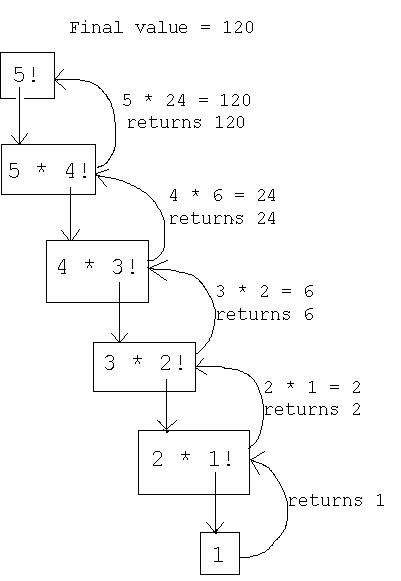

In [171]:
def fact(n):
    '''
    Returns factorial of n (n!).
    Note use of recursion
    '''
    # BASE CASE!
    if n == 0:
        return 1
    
    # Recursion!
    else:
        return n * fact(n-1)

In [178]:
fact(5)

120

# Tree

In [188]:
"""retrurn root and two empty sub-lists. Second list for left child,and third one for the right child"""
def BinaryTree(r):
    return [r,[],[]] 

def insert_left(r,n_branch):
    t=r.pop(1)
    
    if len(t)>1:
        r.insert(1,[n_branch,r,[]])
    else:
        r.insert(1,[n_branch,[],[]])
    return r

def insert_right(r,n_branch):
    t=r.pop(2)
    
    if len(t)>1:
        r.insert(2,[n_branch,[],t])
    else:
        r.insert(2,[n_branch,[],[]])
    return r

def get_root(root):
    return root[0]

def setRoot(root,val):
    root[0]=val

def getLeftChild(root):
    return root[1]
def getRightChild(root):
    return root[1]

In [199]:
b=BinaryTree(3)

In [200]:
insert_left(b,4)

[3, [4, [], []], []]

In [201]:
insert_left(b,5)

[3, [5, [...], []], []]

In [202]:
b

[3, [5, [...], []], []]

In [203]:
insert_right(b,6)

[3, [5, [...], []], [6, [], []]]

In [204]:
b

[3, [5, [...], []], [6, [], []]]